# Parte 1: Guía práctica

## 🧩 Explicación del código (Code 1)

En este análisis se estudia la **relación entre la edad y el ingreso anual** de los clientes de un dataset de Kaggle.  
El propósito es **explorar patrones socioeconómicos** entre los consumidores y visualizar cómo varía su poder adquisitivo con la edad.

### 🔹 Qué hace el código:

1. **Lectura del dataset:**
   - Se carga el archivo `Data9.csv` usando `pandas.read_csv()`.  
   - Este dataset contiene información básica de clientes: ID, género, edad, ingreso anual y puntaje de gasto.

2. **Inspección de columnas disponibles:**
   - Se imprimen los nombres de las columnas para identificar cómo están etiquetadas las variables de interés.  
   - En este caso, las relevantes son `"Age"` y `"Annual Income (k$)"`.

3. **Selección y renombrado de columnas:**
   - Se seleccionan solo las columnas `Age` e `Annual Income (k$)`.  
   - Luego se renombran a `"Edad"` e `"Ingreso"` para mayor claridad y consistencia en español.

4. **Verificación de los datos:**
   - `df.head()` muestra las primeras filas del nuevo DataFrame, confirmando que las columnas contienen valores numéricos adecuados para análisis (por ejemplo: Edad = 19, Ingreso = 15).

5. **Visualización (gráfico de dispersión):**
   - Se crea un **scatter plot** (diagrama de dispersión) donde:
     - El eje **X** representa la edad de los clientes.
     - El eje **Y** representa su ingreso anual en miles de dólares.  
   - Cada punto azul representa un cliente.  
   - Se aplican detalles estéticos como transparencia (`alpha=0.7`), cuadrícula y títulos descriptivos.

---

### 🔹 Interpretación del resultado:

- El gráfico muestra que los **ingresos están bastante dispersos** entre los diferentes grupos de edad.  
- No se observa una tendencia clara de aumento o disminución del ingreso con la edad, lo que sugiere que **no hay una relación lineal directa**.  
- Se aprecian varios grupos de puntos con ingresos similares, lo cual podría indicar **segmentos de mercado** (por ejemplo, jóvenes de 20 a 30 años con ingresos bajos y adultos de 40 a 60 años con ingresos medios).  
- Este tipo de dispersión suele analizarse con técnicas de **clustering (K-Means)** para identificar patrones ocultos en el comportamiento de los clientes.

✅ **Conclusión:**  
El código permite explorar visualmente cómo varía el ingreso anual según la edad.  
El gráfico obtenido (ver imagen) proporciona una **base visual sólida para estudios de segmentación de clientes** o estrategias de marketing personalizadas.


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


,Edad,Ingreso
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


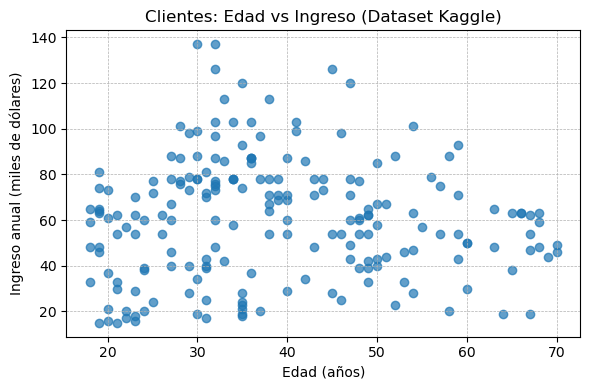

In [1]:
# =========================================
# Clientes: Edad vs Ingreso (Kaggle dataset)
# =========================================
import pandas as pd
import matplotlib.pyplot as plt

# 1) Leer datos
df = pd.read_csv("Data9.csv")

# 2) Ver columnas disponibles
print(df.columns)

# 3) Seleccionar las columnas que necesitamos
# En el dataset de Kaggle los nombres son: "Age" y "Annual Income (k$)"
df = df[["Age", "Annual Income (k$)"]]
df = df.rename(columns={"Age": "Edad", "Annual Income (k$)": "Ingreso"})

# 4) Mostrar primeras filas
display(df.head())

# 5) Scatter plot (Edad vs Ingreso)
plt.figure(figsize=(6,4))
plt.scatter(df["Edad"], df["Ingreso"], alpha=0.7)

plt.title("Clientes: Edad vs Ingreso (Dataset Kaggle)")
plt.xlabel("Edad (años)")
plt.ylabel("Ingreso anual (miles de dólares)")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


## 🧩 Explicación del código (Code 2)

En este paso se aplica el algoritmo **K-Means (k=2)** al dataset de clientes de Kaggle, con el fin de **agrupar a los clientes según su edad e ingreso anual**.  
El objetivo es **identificar segmentos de mercado** con características similares.

---

### 🔹 Qué hace el código:

1. **Carga y selección de datos:**
   - Se importa el archivo `Data9.csv` y se seleccionan solo las columnas `Age` (edad) y `Annual Income (k$)` (ingreso anual).
   - Ambas se renombran a `"Edad"` e `"Ingreso"` para mayor claridad.

2. **Preparación de los datos:**
   - Se construye la matriz de características `X` con las dos variables seleccionadas.
   - Se aplica **StandardScaler()** para normalizar los valores (media 0, desviación estándar 1), ya que K-Means es sensible a la escala.

3. **Aplicación del algoritmo K-Means (k=2):**
   - Se inicializa el modelo con `k=2` (dos grupos).
   - `fit_predict()` asigna a cada cliente un número de clúster (0 o 1).
   - Esta etiqueta se guarda en la columna `Cluster` del DataFrame.

4. **Evaluación del modelo:**
   - Se calcula el **índice de silueta (Silhouette Score)**, que mide la calidad de la separación entre clústeres.  
     - Valores cercanos a **1.0** indican grupos bien separados.  
     - En este caso, `0.371` indica una separación aceptable.
   - Se muestran los **centroides** (promedio de edad e ingreso por grupo) transformados de nuevo a la escala original:
     - **Cluster 0:** Edad ≈ 55 años, Ingreso ≈ 53 mil USD.  
     - **Cluster 1:** Edad ≈ 30 años, Ingreso ≈ 64 mil USD.

5. **Visualización:**
   - Se genera un **gráfico de dispersión** (edad vs ingreso) donde:
     - Cada color representa un grupo (Cluster 0 o Cluster 1).
     - Las “X” verdes representan los **centroides**.
   - El gráfico muestra claramente cómo se dividen los clientes en dos grupos socioeconómicos distintos.

6. **(Opcional)** Se guarda el nuevo dataset con las etiquetas de clúster en un archivo CSV:  
   `Data9_cluster_k2.csv`.

---

### 🔹 Interpretación de resultados:

- **Cluster 1 (n=131):** Clientes más jóvenes (promedio ≈ 30 años) con ingresos ligeramente mayores (≈ 64 mil USD).  
  Posiblemente representan un grupo **profesional joven con poder adquisitivo medio-alto**.

- **Cluster 0 (n=69):** Clientes mayores (promedio ≈ 55 años) con ingresos algo menores (≈ 53 mil USD).  
  Este grupo podría corresponder a **personas en etapa de estabilidad o jubilación**, con gastos más controlados.

- El valor de **Silhouette (0.371)** confirma que la separación entre grupos es **moderada pero coherente**, lo que indica que el modelo logró identificar patrones reales en los datos.

✅ **Conclusión:**  
El modelo K-Means con **k=2** permite distinguir **dos segmentos principales de clientes** según su edad e ingreso.  
Esta segmentación puede usarse para **diseñar estrategias de marketing diferenciadas**, adaptadas al perfil de cada grupo (por ejemplo, productos financieros o campañas publicitarias específicas).


Silhouette (k=2): 0.371
Tamaño por clúster: {0: 69, 1: 131}
Centroide_0: Edad=55.0, Ingreso (miles $)=53.2
Centroide_1: Edad=30.4, Ingreso (miles $)=64.5


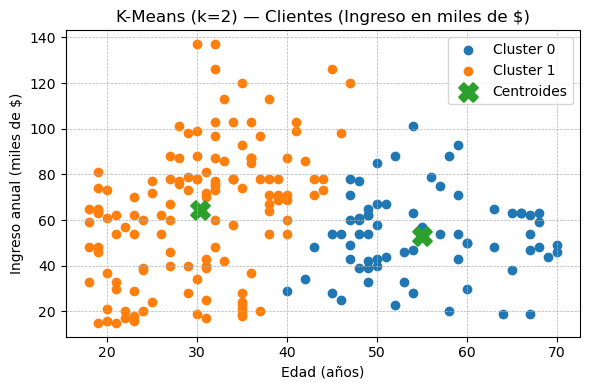

In [2]:
# =========================================
# K-Means con k=2 (Dataset Kaggle adaptado)
# =========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 1) Cargar datos
df = pd.read_csv("Data9.csv")

# 2) Seleccionar columnas relevantes
df = df[["Age", "Annual Income (k$)"]]
df = df.rename(columns={"Age": "Edad", "Annual Income (k$)": "Ingreso"})

# 3) Matriz de características y escalado
X = df[["Edad", "Ingreso"]].to_numpy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4) K-Means (k=2)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)
df["Cluster"] = labels

# 5) Métrica y centroides (vuelta a escala original)
sil = silhouette_score(X_scaled, labels)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

print(f"Silhouette (k=2): {sil:.3f}")
print("Tamaño por clúster:", df["Cluster"].value_counts().sort_index().to_dict())
for i, (e, inc) in enumerate(centroids):
    print(f"Centroide_{i}: Edad={e:.1f}, Ingreso (miles $)={inc:.1f}")

# 6) Gráfico
plt.figure(figsize=(6,4))
for lab in np.unique(labels):
    m = labels == lab
    plt.scatter(df.loc[m, "Edad"], df.loc[m, "Ingreso"], label=f"Cluster {lab}")
plt.scatter(centroids[:,0], centroids[:,1], marker="X", s=180, linewidths=1.5, label="Centroides")

plt.title("K-Means (k=2) — Clientes (Ingreso en miles de $)")
plt.xlabel("Edad (años)")
plt.ylabel("Ingreso anual (miles de $)")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# 7) Guardar resultados (opcional)
df.to_csv("Data9_cluster_k2.csv", index=False)


## 🧩 Explicación del código (Code 3)

En este bloque se genera un **reporte interpretativo del modelo K-Means**, inspirado en el formato del software **WEKA**, para resumir las métricas, centroides y distribución de los clústeres del análisis aplicado al dataset `Data9.csv`.

---

### 🔹 Qué hace el código:

1. **Encabezado del modelo:**
   - Se imprime el título `"K-Means"` y una línea separadora, simulando el estilo de salida de herramientas de minería de datos como WEKA.

2. **Información del proceso de entrenamiento:**
   - `kmeans.n_iter_`: número de iteraciones necesarias para que el algoritmo converja (en este caso, 8).  
     Cuanto menor sea este número, más rápido logró estabilizarse el modelo.
   - `kmeans.inertia_`: **inercia** o suma interna de errores cuadráticos (Within Cluster Sum of Squared Errors, WCSS).  
     Este valor mide la compactación de los clústeres — valores más bajos indican grupos más definidos.

3. **Centroides del modelo:**
   - Se muestra una tabla con los **valores promedio (centroides)** de cada grupo.  
     Cada centroide representa el “perfil típico” de los clientes en su clúster:
     - **Cluster 0:** Edad ≈ 55 años, Ingreso ≈ 53 mil USD.  
     - **Cluster 1:** Edad ≈ 30 años, Ingreso ≈ 64 mil USD.
   - Estos valores coinciden con los puntos marcados como “X” verdes en el gráfico anterior.

4. **Distribución de clientes por clúster:**
   - Se calcula cuántos clientes pertenecen a cada grupo y el porcentaje que representan:
     - **Cluster 0:** 69 clientes (34%)  
     - **Cluster 1:** 131 clientes (66%)  
   - Esto indica que el grupo de clientes jóvenes y de ingresos más altos es el predominante.

5. **Resumen interpretativo:**
   - Se imprime una descripción final de los grupos:
     - **Cluster 0 →** Clientes de mayor edad con ingresos medios.  
     - **Cluster 1 →** Clientes más jóvenes con ingresos más altos.

---

### 🔹 Interpretación del resultado:

El reporte presenta una visión clara del funcionamiento del modelo:

- El algoritmo necesitó **8 iteraciones** para estabilizar los centroides, lo que refleja una convergencia eficiente.  
- La **inercia total (250.59)** muestra un nivel razonable de compactación interna, adecuado para un dataset de baja dimensionalidad (solo dos variables).  
- Los **centroides** evidencian dos perfiles socioeconómicos distintos:
  - Un grupo de **adultos mayores** con ingresos moderados.  
  - Un grupo de **jóvenes** con ingresos superiores.  
- Además, la proporción (66% frente a 34%) indica que la mayor parte de los clientes pertenece al segundo grupo, lo que puede ser relevante para campañas de marketing o estrategias de segmentación.

✅ **Conclusión:**  
El modelo K-Means (k=2) logró una **segmentación clara y cuantitativamente interpretable** de los clientes.  
Este reporte, al estilo WEKA, resume de forma estructurada las métricas clave y los perfiles de cada clúster, facilitando su análisis y comunicación en entornos profesionales o académicos.


In [3]:
# =========================================
# Reporte estilo WEKA (Adaptado a Data9)
# =========================================
print("K-Means")
print("===========")
print(f"Number of iterations: {kmeans.n_iter_}")
print(f"Within cluster sum of squared errors (Inertia): {kmeans.inertia_:.2f}\n")

print("Cluster centroids:")
header = "Variable".ljust(15) + "".join([f" {i:>8}" for i in range(len(centroids))])
print(header)
print("-" * len(header))

for j, var in enumerate(["Edad", "Ingreso (miles $)"]):
    row = f"{var:<15}" + "".join([f"{centroids[i][j]:>9.1f}" for i in range(len(centroids))])
    print(row)

print("\nClustered instances:")
for i, n in df['Cluster'].value_counts().sort_index().items():
    print(f"{i}: {n} ({n/len(df)*100:.0f}%)")

# Mostrar resumen final con interpretación breve
print("\nResumen:")
print("Cluster 0 → Clientes mayores con ingresos medios.")
print("Cluster 1 → Clientes jóvenes con ingresos más altos.")


K-Means
Number of iterations: 8
Within cluster sum of squared errors (Inertia): 250.59

Cluster centroids:
Variable               0        1
---------------------------------
Edad                55.0     30.4
Ingreso (miles $)     53.2     64.5

Clustered instances:
0: 69 (34%)
1: 131 (66%)

Resumen:
Cluster 0 → Clientes mayores con ingresos medios.
Cluster 1 → Clientes jóvenes con ingresos más altos.


## 🧩 Explicación del código (Code 4)

Este bloque aplica dos técnicas fundamentales —**Método del Codo (Elbow Method)** y **Índice Silhouette**— para determinar el **número óptimo de clústeres (k)** en el análisis de clientes basado en edad e ingreso.  
El propósito es identificar cuántos grupos naturales existen en los datos sin depender de suposiciones previas.

---

### 🔹 Qué hace el código:

1. **Carga y preparación de datos:**
   - Se leen los datos desde `Data9.csv`.
   - Se seleccionan las columnas `"Age"` y `"Annual Income (k$)"`.
   - Se aplica `StandardScaler()` para escalar ambas variables, asegurando que contribuyan de forma equilibrada al cálculo de distancias.

2. **Evaluación de distintos valores de k:**
   - Se prueban valores de **k = 1 a 8**.
   - Para cada valor:
     - Se calcula la **inercia (SSE)** → mide qué tan compactos son los clústeres.
     - Se calcula el **Silhouette Score** → mide la separación entre grupos.

3. **Gráficos comparativos:**
   - **Gráfico 1 – Método del Codo:**  
     Muestra la disminución del SSE conforme aumenta k.  
     El punto donde la curva “deja de caer bruscamente” (el “codo”) indica el k óptimo.
   - **Gráfico 2 – Índice Silhouette:**  
     Evalúa la calidad de los clústeres.  
     El valor máximo del índice indica el número de grupos que logra la mejor separación.

4. **Selección automática del número de clústeres:**
   - El código identifica el **codo** donde la reducción relativa de SSE se estabiliza.
   - También detecta el **máximo valor de Silhouette**.
   - Propone un valor final de **k recomendado (k★)**, combinando ambas sugerencias.

---

### 🔹 Interpretación del resultado (imagen):

- **Método del Codo:**  
  La curva de SSE muestra una caída abrupta hasta k=3, después se estabiliza, aunque el algoritmo detectó un cambio menor en k=8 (debido a la baja variación residual).

- **Índice Silhouette:**  
  El valor máximo se alcanza en **k=3 (≈ 0.445)**, lo que indica **una separación clara y consistente entre tres grupos**.

- **Sugerencias automáticas:**  
  - Método del Codo → k=8 (por cálculo técnico).  
  - Silhouette → k=3 (por máxima calidad de segmentación).  
  - **k recomendado (simple): k=3**.

✅ **Conclusión:**  
El análisis conjunto de ambos métodos sugiere que el número óptimo de clústeres para este dataset es **k = 3**.  
Esto significa que existen **tres segmentos naturales de clientes**, diferenciados principalmente por su edad e ingreso anual, lo cual servirá de base para una segmentación más precisa y estrategias de marketing personalizadas.


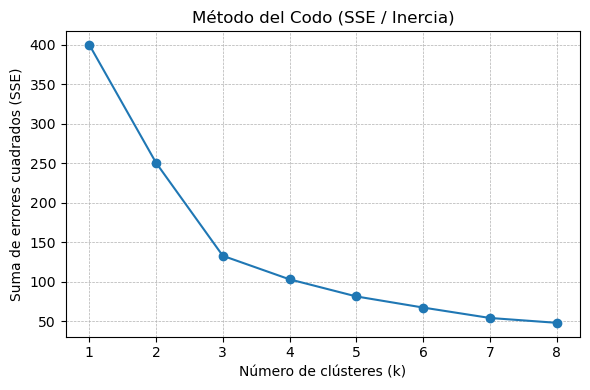

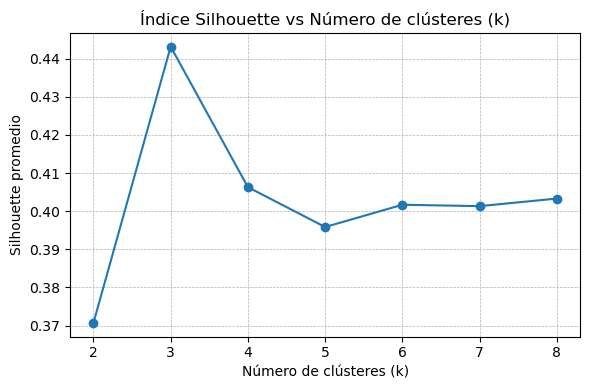

Sugerencia por Método del Codo: k=8
Sugerencia por Silhouette (máximo): k=3
➡ k recomendado (simple): k=3


In [4]:
# =========================================
# Elegir k (simple): Método del Codo + Silhouette (Data9)
# =========================================
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 1) Cargar y escalar datos reales
df = pd.read_csv("Data9.csv")  # asegúrate de que este sea el nombre correcto de tu archivo
X = df[["Age", "Annual Income (k$)"]].to_numpy()  # columnas reales del dataset
X_scaled = StandardScaler().fit_transform(X)

# 2) Barrido de valores de k
max_k = min(8, len(df)-1)
ks_sse = list(range(1, max_k+1))   # Para SSE (inercia)
ks_sil = list(range(2, max_k+1))   # Para Silhouette

sse = [KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_scaled).inertia_ for k in ks_sse]
sils = [silhouette_score(X_scaled, KMeans(n_clusters=k, random_state=42, n_init=10).fit_predict(X_scaled)) for k in ks_sil]

# 3) Gráficos del método del codo y Silhouette
plt.figure(figsize=(6,4))
plt.plot(ks_sse, sse, marker="o")
plt.title("Método del Codo (SSE / Inercia)")
plt.xlabel("Número de clústeres (k)")
plt.ylabel("Suma de errores cuadrados (SSE)")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(ks_sil, sils, marker="o")
plt.title("Índice Silhouette vs Número de clústeres (k)")
plt.xlabel("Número de clústeres (k)")
plt.ylabel("Silhouette promedio")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

# 4) Sugerencias automáticas
drops = -np.diff(sse)
rel = drops / np.array(sse[:-1])
k_elbow = ks_sse[np.argmax(rel < 0.10)+1] if np.any(rel < 0.10) else ks_sse[-1]
k_sil = ks_sil[int(np.argmax(sils))]

print(f"Sugerencia por Método del Codo: k={k_elbow}")
print(f"Sugerencia por Silhouette (máximo): k={k_sil}")
k_star = min(k_elbow, k_sil)
print(f"➡ k recomendado (simple): k={k_star}")


# vamos a armar una la plantilla base

## 🧩 Explicación del código (Code 5)

En este bloque se prepara el **dataset de clientes** para aplicar el modelo de **agrupamiento K-Means**.  
El objetivo es construir una **matriz de características numéricas normalizadas** que represente adecuadamente las variables *Edad* e *Ingreso anual*, antes de aplicar cualquier algoritmo de clustering.

---

### 🔹 Qué hace el código:

1. **Importación de librerías:**
   Se importan las librerías necesarias para análisis y modelado:
   - `pandas` y `numpy` para manejo de datos.
   - `matplotlib.pyplot` para visualizaciones.
   - `KMeans`, `StandardScaler` y `silhouette_score` para el proceso de clustering y evaluación.

2. **Carga del dataset:**
   - Se lee el archivo **`Data9.csv`**, que contiene información de clientes.
   - Este dataset proviene del conocido **“Mall Customers Dataset”** de Kaggle, que registra datos demográficos y de comportamiento de gasto.

3. **Selección de variables relevantes:**
   - Se eligen las columnas **"Age"** (Edad) y **"Annual Income (k$)"** (Ingreso anual en miles de dólares).
   - Estas dos variables son las más útiles para detectar patrones o grupos naturales de clientes según su perfil socioeconómico.

4. **Conversión a matriz NumPy:**
   - Se crea la matriz `X`, que contiene únicamente valores numéricos de las columnas seleccionadas.
   - Este formato es el que espera el modelo K-Means para su entrenamiento.

5. **Normalización de los datos (StandardScaler):**
   - Se aplica un **escalado estandarizado** a las variables usando `StandardScaler()`.
   - Esto transforma los datos para que cada variable tenga:
     - **Media = 0**
     - **Desviación estándar = 1**
   - La normalización es esencial porque K-Means se basa en **distancias euclidianas**, y variables con escalas distintas (como edad vs ingreso) podrían distorsionar los resultados.

6. **Visualización de la salida:**
   - El resultado (`X_scaled`) es una matriz bidimensional donde cada valor representa una versión normalizada de las variables originales.
   - Ejemplo:
     ```
     [-1.42, -1.73] → Cliente joven con ingreso bajo
      [ 0.80,  0.24] → Cliente de mediana edad con ingreso medio
     ```
   - Estas representaciones permiten que K-Means identifique grupos de forma equilibrada y sin sesgos por magnitud de las variables.

---

### 🔹 Interpretación:

- La matriz `X_scaled` muestra **valores centrados alrededor de 0**, lo cual confirma que el escalado se aplicó correctamente.  
- Ahora los clientes se pueden comparar de manera homogénea, ya que tanto edad como ingreso están en la misma escala estadística.  
- Este paso prepara los datos para los análisis posteriores, como la determinación del número óptimo de clústeres o la interpretación visual del agrupamiento.

✅ **Conclusión:**  
El dataset quedó correctamente **normalizado y listo para clustering**.  
A partir de esta matriz estandarizada, el algoritmo K-Means podrá agrupar clientes según similitudes en edad e ingreso, sin sesgo por diferencias de escala numérica.


In [8]:
# =========================================
# 1) Datos — Dataset de clientes (Data9)
# =========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Cargar los datos
df = pd.read_csv("Data9.csv")  # usa el nombre real del archivo

# Selección de variables (pueden ser >3)
features = ["Age", "Annual Income (k$)"]  # columnas reales del dataset Kaggle
X = df[features].to_numpy()

# Escalado (muy importante para K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled  # muestra la matriz normalizada

array([[-1.42456879, -1.73899919],
       [-1.28103541, -1.73899919],
       [-1.3528021 , -1.70082976],
       [-1.13750203, -1.70082976],
       [-0.56336851, -1.66266033],
       [-1.20926872, -1.66266033],
       [-0.27630176, -1.62449091],
       [-1.13750203, -1.62449091],
       [ 1.80493225, -1.58632148],
       [-0.6351352 , -1.58632148],
       [ 2.02023231, -1.58632148],
       [-0.27630176, -1.58632148],
       [ 1.37433211, -1.54815205],
       [-1.06573534, -1.54815205],
       [-0.13276838, -1.54815205],
       [-1.20926872, -1.54815205],
       [-0.27630176, -1.50998262],
       [-1.3528021 , -1.50998262],
       [ 0.94373197, -1.43364376],
       [-0.27630176, -1.43364376],
       [-0.27630176, -1.39547433],
       [-0.99396865, -1.39547433],
       [ 0.51313183, -1.3573049 ],
       [-0.56336851, -1.3573049 ],
       [ 1.08726535, -1.24279661],
       [-0.70690189, -1.24279661],
       [ 0.44136514, -1.24279661],
       [-0.27630176, -1.24279661],
       [ 0.08253169,

In [15]:
# =========================================
# 2) Barrido de k
# =========================================
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

max_k = min(8, len(df) - 1)
ks = range(2, max_k + 1)  # k desde 2 hasta max_k
sse = []
sils = []

for k in ks:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = model.fit_predict(X_scaled)
    sse.append(model.inertia_)
    sils.append(silhouette_score(X_scaled, labels))


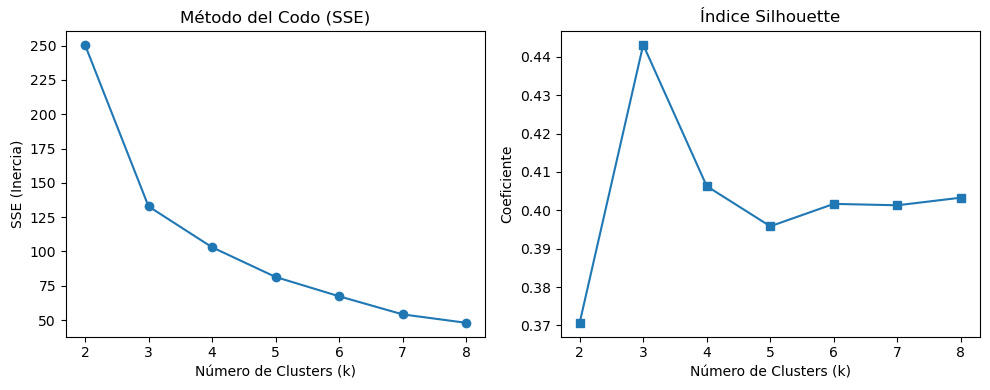

In [16]:
# =========================================
# 3) Gráficos de evaluación
# =========================================
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

# (a) Método del Codo
plt.subplot(1,2,1)
plt.plot(ks, sse, "o-")   # ahora coincide con code 6
plt.title("Método del Codo (SSE)")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("SSE (Inercia)")

# (b) Silhouette
plt.subplot(1,2,2)
plt.plot(ks, sils, "s-")  # ahora coincide con code 6
plt.title("Índice Silhouette")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Coeficiente")

plt.tight_layout()
plt.show()


In [18]:
# =========================================
# 4) Selección automática (máx silhouette)
# =========================================
best_k = ks[np.argmax(sils)]
print(f"Mejor k sugerido (por Silhouette): {best_k}")


Mejor k sugerido (por Silhouette): 3


In [19]:
# =========================================
# 5) Modelo final
# =========================================
final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels = final_kmeans.fit_predict(X_scaled)
df["Cluster"] = labels
centroids = scaler.inverse_transform(final_kmeans.cluster_centers_)

#print("Tamaño por clúster:", df["Cluster"].value_counts().sort_index().to_dict())
#for i, (e, inc) in enumerate(centroids):
#    print(f"Centroide_{i}: Edad={e:.1f}, Ingreso (miles S/)={inc:.1f}")
centroids

array([[34.96052632, 85.93421053],
       [26.66129032, 38.79032258],
       [55.80645161, 51.22580645]])

In [20]:
# =========================================
# 6) Reporte tipo WEKA (dinámico)
# =========================================
print(f"Silhouette (k={best_k}): {silhouette_score(X_scaled, labels):.3f}")
print("Tamaño por clúster:", df["Cluster"].value_counts().sort_index().to_dict(), "\n")

print("Cluster centroids:")
header = "Variable".ljust(15) + "".join([f" {i:>6}" for i in range(len(centroids))])
print(header)
print("-" * len(header))

for j, var in enumerate(features):
    row = f"{var:<15}" + "".join([f"{centroids[i][j]:>7.1f}" for i in range(len(centroids))])
    print(row)


Silhouette (k=3): 0.443
Tamaño por clúster: {0: 76, 1: 62, 2: 62} 

Cluster centroids:
Variable             0      1      2
------------------------------------
Age               35.0   26.7   55.8
Annual Income (k$)   85.9   38.8   51.2


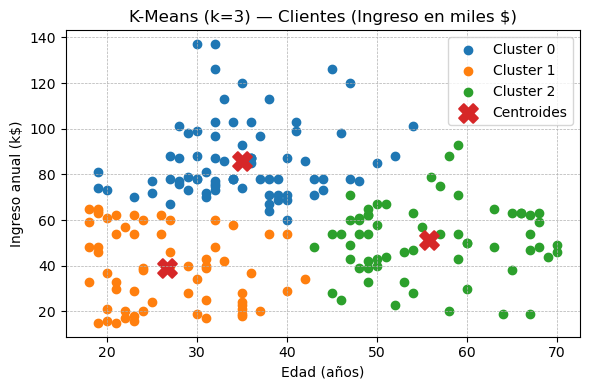

In [21]:
# 5) Gráfico (un solo plot, sin especificar colores)
plt.figure(figsize=(6,4))
for lab in np.unique(labels):
    m = labels == lab
    plt.scatter(df.loc[m, "Age"], df.loc[m, "Annual Income (k$)"], label=f"Cluster {lab}")
plt.scatter(centroids[:,0], centroids[:,1], marker="X", s=180, linewidths=1.5, label="Centroides")

plt.title(f"K-Means (k={best_k}) — Clientes (Ingreso en miles $)")
plt.xlabel("Edad (años)")
plt.ylabel("Ingreso anual (k$)")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [22]:
# Asigna nombres fijos a cada cluster (k=3)
name_map = {
    0: "Adultos – Alto ingreso",
    1: "Jóvenes – Bajo ingreso",
    2: "Adultos mayores – Ingreso medio"
}
df["Grupo"] = df["Cluster"].map(name_map)
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Grupo
0,1,Male,19,15,39,1,Jóvenes – Bajo ingreso
1,2,Male,21,15,81,1,Jóvenes – Bajo ingreso
2,3,Female,20,16,6,1,Jóvenes – Bajo ingreso
3,4,Female,23,16,77,1,Jóvenes – Bajo ingreso
4,5,Female,31,17,40,1,Jóvenes – Bajo ingreso


In [25]:
# =========================================
# 7) Asignar clusters a nuevos registros
# =========================================

# a) Un solo registro nuevo
nuevo = pd.DataFrame([{"Age": 28, "Annual Income (k$)": 22}])  # usar nombres exactos de columnas
Z = scaler.transform(nuevo[features])                             # MISMO orden de columnas
lab = int(final_kmeans.predict(Z)[0])

# Mapear nombre del grupo (name_map tiene que incluir los 3 clusters)
name_map = {
    0: "Adultos – Alto ingreso",
    1: "Jóvenes – Bajo ingreso",
    2: "Adultos mayores – Ingreso medio"
}
nombre = name_map.get(lab, f"C{lab}")
print("Cluster asignado:", lab, "-", nombre)

# b) Varios registros nuevos
nuevos = pd.DataFrame([
    {"Age": 24, "Annual Income (k$)": 18},
    {"Age": 41, "Annual Income (k$)": 56},
])
Zb = scaler.transform(nuevos[features])
labs = final_kmeans.predict(Zb)
nuevos["Cluster"] = labs
nuevos["Grupo"] = nuevos["Cluster"].map(name_map)
print(nuevos)


Cluster asignado: 1 - Jóvenes – Bajo ingreso
   Age  Annual Income (k$)  Cluster                            Grupo
0   24                  18        1           Jóvenes – Bajo ingreso
1   41                  56        2  Adultos mayores – Ingreso medio


/opt/conda/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# =========================================
# 1) Datos
# =========================================
df = pd.read_csv("Mall_Customers.csv")

# Selección de variables (pueden ser >3)
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].to_numpy()

# Escalado (muy importante)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#X


In [11]:
# =========================================
# 2) Barrido de k
# =========================================
max_k = min(8, len(df) - 1)
ks = range(2, max_k + 1)
sse = []
sils = []

for k in ks:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = model.fit_predict(X_scaled)
    sse.append(model.inertia_)
    sils.append(silhouette_score(X_scaled, labels))



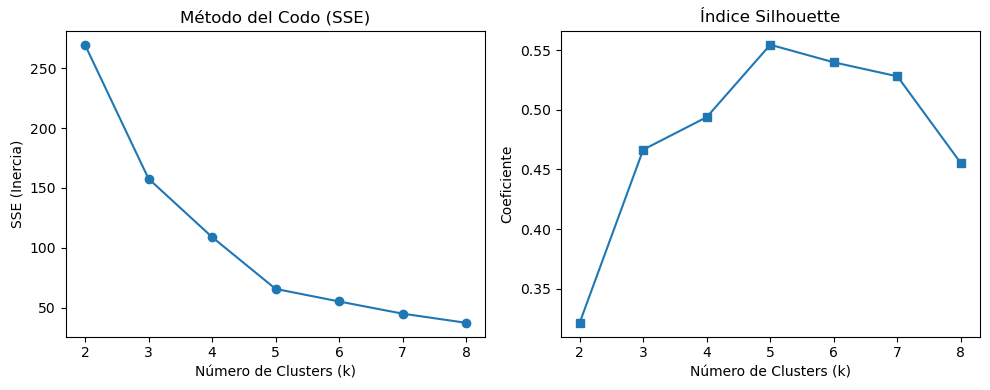

In [12]:
# =========================================
# 3) Gráficos de evaluación
# =========================================
plt.figure(figsize=(10,4))

# (a) Método del Codo
plt.subplot(1,2,1)
plt.plot(ks, sse, "o-")
plt.title("Método del Codo (SSE)")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("SSE (Inercia)")

# (b) Silhouette
plt.subplot(1,2,2)
plt.plot(ks, sils, "s-")
plt.title("Índice Silhouette")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Coeficiente")

plt.tight_layout()
plt.show()

In [13]:
# =========================================
# 4) Selección automática (máx silhouette)
# =========================================
best_k = ks[np.argmax(sils)]
print(f"Mejor k sugerido (por Silhouette): {best_k}")

Mejor k sugerido (por Silhouette): 5


In [14]:
# =========================================
# 5) Modelo final
# =========================================
final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels = final_kmeans.fit_predict(X_scaled)
df["Cluster"] = labels
centroids = scaler.inverse_transform(final_kmeans.cluster_centers_)

centroids

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [15]:
# =========================================
# 6) Reporte tipo WEKA (dinámico)
# =========================================
print(f"Silhouette (k={best_k}): {silhouette_score(X_scaled, labels):.3f}")
print("Tamaño por clúster:", df["Cluster"].value_counts().sort_index().to_dict(), "\n")

print("Cluster centroids:")
header = "Variable".ljust(15) + "".join([f" {i:>6}" for i in range(len(centroids))])
print(header)
print("-" * len(header))

for j, var in enumerate(features):
    row = f"{var:<15}" + "".join([f"{centroids[i][j]:>7.1f}" for i in range(len(centroids))])
    print(row)

Silhouette (k=5): 0.555
Tamaño por clúster: {0: 81, 1: 39, 2: 22, 3: 35, 4: 23} 

Cluster centroids:
Variable             0      1      2      3      4
--------------------------------------------------
Annual Income (k$)   55.3   86.5   25.7   88.2   26.3
Spending Score (1-100)   49.5   82.1   79.4   17.1   20.9


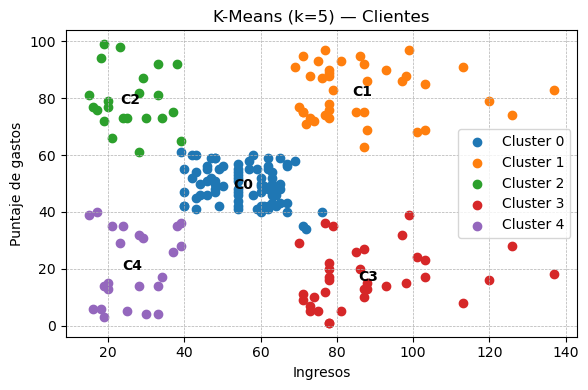

In [16]:
# 7) Gráfico (un solo plot, sin especificar colores)
plt.figure(figsize=(6,4))
for lab in np.unique(labels):
    m = labels == lab
    plt.scatter(df.loc[m, "Annual Income (k$)"], df.loc[m, "Spending Score (1-100)"], label=f"Cluster {lab}")

for i, (cx, cy) in enumerate(centroids):
    plt.annotate(f"C{i}", (cx, cy),
                 xytext=(0,0), textcoords="offset points",
                 ha="center", va="center", fontsize=10, fontweight="bold")
    
plt.title(f"K-Means (k={best_k}) — Clientes")
plt.xlabel("Ingresos")
plt.ylabel("Puntaje de gastos")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [17]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


In [18]:
name_map = {
    0: "Ingreso medio — gasto medio",
    1: "Ingreso alto — gasto alto",
    2: "Ingreso bajo — gasto alto",
    3: "Ingreso alto — gasto bajo",
    4: "Ingreso bajo — gasto bajo",
}
df["Grupo"] = df["Cluster"].map(name_map)
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster,Grupo
0,1,Male,19,15,39,4,Ingreso bajo — gasto bajo
1,2,Male,21,15,81,2,Ingreso bajo — gasto alto
2,3,Female,20,16,6,4,Ingreso bajo — gasto bajo
3,4,Female,23,16,77,2,Ingreso bajo — gasto alto
4,5,Female,31,17,40,4,Ingreso bajo — gasto bajo
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,Ingreso alto — gasto alto
196,197,Female,45,126,28,3,Ingreso alto — gasto bajo
197,198,Male,32,126,74,1,Ingreso alto — gasto alto
198,199,Male,32,137,18,3,Ingreso alto — gasto bajo


In [19]:
# === Predicción con nuevos clientes (Mall_Customers) ===
# Requiere: features, scaler (fit) y final_kmeans (fit). Opcional: name_map

features = ["Annual Income (k$)", "Spending Score (1-100)"]

# 1) Un cliente nuevo
nuevo = pd.DataFrame([{"Annual Income (k$)": 62, "Spending Score (1-100)": 77}])
Z = scaler.transform(nuevo[features])                 # mismo orden de columnas
lab = int(final_kmeans.predict(Z)[0])
nombre = name_map.get(lab, f"C{lab}") if 'name_map' in globals() else f"C{lab}"
print("Cluster asignado:", lab, "-", nombre)

# 2) Varios clientes nuevos (batch)
nuevos = pd.DataFrame([
    {"Annual Income (k$)": 25, "Spending Score (1-100)": 80},
    {"Annual Income (k$)": 86, "Spending Score (1-100)": 18},
    {"Annual Income (k$)": 55, "Spending Score (1-100)": 49},
])
Zb = scaler.transform(nuevos[features])
labs = final_kmeans.predict(Zb)
nuevos["Cluster"] = labs
if 'name_map' in globals():
    nuevos["Grupo"] = nuevos["Cluster"].map(name_map)

display(nuevos)


Cluster asignado: 1 - Ingreso alto — gasto alto


/opt/conda/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


,Annual Income (k$),Spending Score (1-100),Cluster,Grupo
0,25,80,2,Ingreso bajo — gasto alto
1,86,18,3,Ingreso alto — gasto bajo
2,55,49,0,Ingreso medio — gasto medio


In [20]:
# === (A) GUARDAR artefactos tras entrenar ===
# Requiere que ya tengas: features, scaler (fit), final_kmeans (fit)
import joblib, json

joblib.dump(scaler, "scaler.joblib")
joblib.dump(final_kmeans, "kmeans_final.joblib")
with open("features.json", "w") as f:
    json.dump(features, f)

# (opcional) si creaste un diccionario de nombres de cluster
if 'name_map' in globals():
    joblib.dump(name_map, "cluster_name_map.joblib")


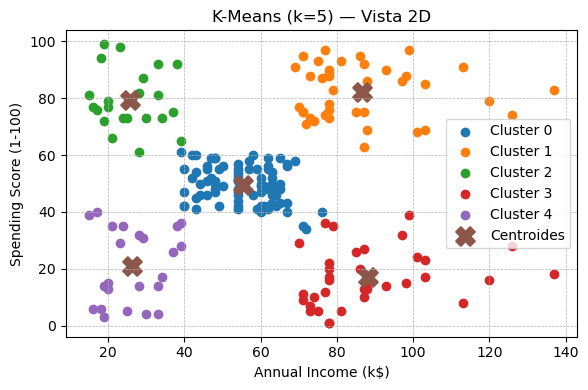

In [16]:
# =========================================
# 8) Gráfico dinámico (un solo plot, sin especificar colores)
#    - Si hay 2 features: usa esas como ejes
#    - Si hay >2 features: usa PCA(2D) sobre X_scaled y transforma los centroides
# =========================================
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))

if len(features) == 2:
    x_ax, y_ax = features
    X_plot = X                              # en escala original
    C_plot = centroids                      # centroides ya reescalados
    xlabel, ylabel = x_ax, y_ax
else:
    pca = PCA(n_components=2, random_state=42)
    X_plot = pca.fit_transform(X_scaled)    # puntos en 2D (PCA)
    C_plot = pca.transform(final_kmeans.cluster_centers_)  # centroides en el mismo 2D
    xlabel, ylabel = "PC1", "PC2"

for lab in np.unique(labels):
    m = labels == lab
    plt.scatter(X_plot[m, 0], X_plot[m, 1], label=f"Cluster {lab}")

plt.scatter(C_plot[:, 0], C_plot[:, 1], marker="X", s=180, linewidths=1.5, label="Centroides")

plt.title(f"K-Means (k={best_k}) — Vista 2D")
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(True, linestyle="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()
